In [4]:
#Import Pandas and BigQuery
import pandas as pd
from google.cloud import bigquery
client =bigquery.Client()

In [11]:
 #Quering bigquery to access data and creating dataset
    
query = '''SELECT * FROM `analytics-univ.vehicle.vehicle` 
 '''
vehicle =client.query(query).to_dataframe()

In [4]:
#Number of rows and columns in dataset
vehicle.shape

(426083, 9)

In [5]:
#column name in dataset
vehicle.columns

Index(['TIS', 'Model_year', 'model_line', 'transmission', 'engine',
       'body_style', 'country', 'drive', 'mileage'],
      dtype='object')

In [6]:
#Datatypes of avaiable feature variables 
vehicle.dtypes

TIS              int64
Model_year       int64
model_line      object
transmission    object
engine          object
body_style      object
country         object
drive           object
mileage          int64
dtype: object

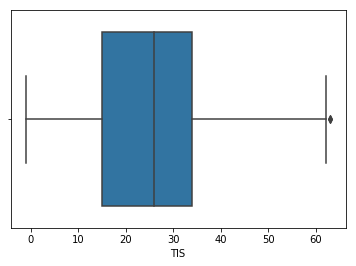

In [7]:
#univariant outlier detection for 'TIME IN SERVICE' feature column using BOX plot
import seaborn as sns
sns.boxplot(vehicle['TIS'])

In [ ]:
#quering database to delet an outlier in TIS column 
query = '''Delete FROM `analytics-univ.vehicle.vehicle` where TIS = (SELECT MAX(TIS) FROM `analytics-univ.vehicle.vehicle`)'''
client.query(query).to_dataframe()

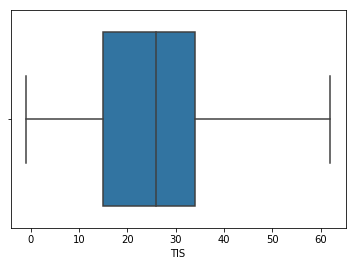

In [9]:
#Boxplot after deleting outlier
import seaborn as sns
sns.boxplot(vehicle['TIS'])

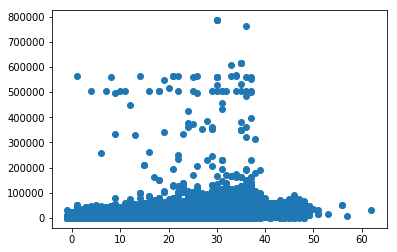

In [14]:
#Multivariant outlier detection without preproccessing 
#Using Scatter plot to visualize two variable correlation 

import matplotlib.pyplot as plt
plt.scatter(vehicle['TIS'], vehicle['mileage'])
plt.show()


In [18]:
# querieng database to clean vehice  dataset 
#quering database to delet an outlier in TIS column 
query = '''
DELETE FROM `analytics-univ.vehicle.vehicle`
where TIS < 0'''
client.query(query)

In [20]:
#Delete records which has 0 Time IN Service
query1 = '''
DELETE FROM `analytics-univ.vehicle.vehicle`
where TIS = 0'''
client.query(query1)

In [21]:
#Delete records which are invalid or there is no combination 
query2 = '''
DELETE FROM `analytics-univ.vehicle.vehicle`
where TIS <= 5
and mileage >100000'''
client.query(query2)

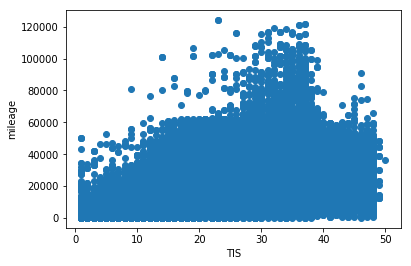

In [18]:
#Using Scatter plot to visualize two variable correlation after deleting outlier

import matplotlib.pyplot as plt
plt.scatter(vehicle['TIS'], vehicle['mileage'])
plt.xlabel('TIS')
plt.ylabel('mileage')
plt.show()

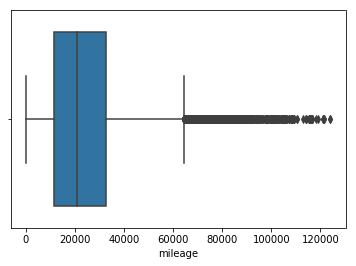

In [12]:
import seaborn as sns
sns.boxplot(vehicle['mileage'])

In [14]:
import numpy as np
anomalies = []

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(vehicle['mileage'])

-20326.918428582754


[77233,
 65799,
 73838,
 90630,
 106573,
 91101,
 79595,
 67443,
 70724,
 67428,
 66267,
 79595,
 88980,
 91966,
 69170,
 80340,
 68942,
 104251,
 71419,
 70724,
 76552,
 69956,
 83063,
 70197,
 88115,
 84856,
 98861,
 76552,
 78343,
 92789,
 97531,
 98861,
 66002,
 80874,
 72448,
 79595,
 71094,
 76740,
 102091,
 66585,
 69956,
 74510,
 68942,
 69015,
 98861,
 66002,
 97531,
 84563,
 77887,
 76740,
 97565,
 72375,
 90770,
 68942,
 81277,
 79077,
 97472,
 69707,
 83616,
 97531,
 74975,
 78976,
 76344,
 97531,
 81766,
 76424,
 81810,
 80073,
 77992,
 79081,
 70724,
 90537,
 92228,
 76344,
 70289,
 84185,
 97565,
 69956,
 68942,
 81766,
 90537,
 72792,
 72792,
 77223,
 82904,
 82904,
 82904,
 77223,
 68245,
 73012,
 81338,
 67609,
 70110,
 67475,
 77332,
 74957,
 65997,
 68504,
 69533,
 67493,
 67809,
 67809,
 84065,
 86808,
 71215,
 83310,
 103044,
 69285,
 70064,
 89713,
 89713,
 70064,
 83310,
 91305,
 70354,
 70064,
 65896,
 80930,
 102041,
 76343,
 85122,
 81856,
 83310,
 79562,
 91